# 🧠 UNIDAD 3 — PARTE 2: Redes Neuronales para Nanotecnología
**Curso:** Modelado, Simulación e IA en Nanotecnología  
**Prerrequisito:** Completar UNIDAD_3_ML_FUNDAMENTOS.ipynb

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tu-usuario/tu-repo/blob/main/notebooks/UNIDAD_3_PARTE2_REDES_NEURONALES.ipynb)

> 💡 **GPU recomendada para CNN y Fine-tuning:** `Runtime → Change runtime type → T4 GPU`


In [1]:
# ============================================================
# ⚙️  CELDA DE SETUP — Ejecutar primero
# ============================================================
import sys, subprocess

def _install(pkg):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])

for pkg, imp in [('numpy', 'numpy'), ('matplotlib', 'matplotlib'),
                 ('scikit-learn', 'sklearn'), ('tensorflow', 'tensorflow')]:
    try:
        __import__(imp)
        print(f"✅ {pkg}")
    except ImportError:
        print(f"Instalando {pkg}...")
        _install(pkg)

import numpy as np
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
print("\n✅ Entorno listo. (torch-geometric se instala en la sección GNN)")


✅ numpy
✅ matplotlib
✅ scikit-learn
Instalando tensorflow...

✅ Entorno listo. (torch-geometric se instala en la sección GNN)


---
# 📚 Sección 0: Fundamentos Teóricos de Redes Neuronales

---

## 0.1 ¿Cómo funciona una Red Neuronal?

### La neurona artificial

Una neurona recibe $n$ entradas, les aplica pesos y una función de activación:

$$z = \sum_{i=1}^{n} w_i x_i + b \qquad a = \sigma(z)$$

Donde $\sigma$ es la función de activación (ReLU, sigmoid, tanh...).

### Arquitectura MLP

```
Capa de entrada    Capas ocultas       Capa de salida
x₁ ─────────┐
x₂ ──────── ⊕──σ── h₁ ──⊕──σ── h₃ ──⊕── ŷ
x₃ ─────────┘      h₂ ──┘
           W¹, b¹        W², b²   W³, b³
```

**Forward pass:**
$$\mathbf{a}^{[l]} = \sigma\!\left(W^{[l]}\,\mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}\right)$$

### ¿Cómo aprende?

1. **Forward pass:** Calcula $\hat{y}$ desde la entrada hasta la salida
2. **Pérdida:** $\mathcal{L}(\hat{y}, y)$ — qué tan lejos está la predicción
3. **Backward pass:** Regla de la cadena → $\frac{\partial \mathcal{L}}{\partial W^{[l]}}$ para cada capa
4. **Actualización:** $W^{[l]} \leftarrow W^{[l]} - \eta\, \nabla_{W^{[l]}} \mathcal{L}$

Repite hasta convergencia. Aprender = ajustar $W$ y $\mathbf{b}$ para minimizar $\mathcal{L}$.

### Funciones de activación comunes

| Función | Fórmula | Uso |
|---------|---------|-----|
| **ReLU** | $\max(0, z)$ | Capas ocultas (más común) |
| **Sigmoid** | $\frac{1}{1+e^{-z}}$ | Salida binaria |
| **Tanh** | $\frac{e^z - e^{-z}}{e^z + e^{-z}}$ | Salida en [-1, 1] |
| **Softmax** | $\frac{e^{z_i}}{\sum_j e^{z_j}}$ | Clasificación multiclase |
| **Lineal** | $z$ | Regresión (capa de salida) |


---

## 0.2 Tipos de Redes Neuronales y sus Aplicaciones en Nanotecnología

| Tipo | Arquitectura clave | Cuándo usar | Aplicación en Nanotecnología |
|------|--------------------|-------------|------------------------------|
| **MLP / Feedforward** | Capas densas | Datos tabulares | Predicción de propiedades (Eg, Tm, actividad catalítica) |
| **CNN** | Convolución + Pooling + Dense | Imágenes con estructura espacial | Análisis TEM/SEM, clasificación morfológica |
| **RNN / LSTM** | Capas recurrentes con memoria | Secuencias temporales | Trayectorias MD, espectros en tiempo |
| **GNN** | Message passing en grafos | Moléculas y cristales | Potenciales NNP, SchNet, DimeNet |
| **Autoencoder** | Encoder → bottleneck → Decoder | Reducción dim., anomalías | Compresión de descriptores, detección de defectos |
| **VAE** | AE variacional (espacio latente ~ N) | Generación de nuevas estructuras | Diseño molecular latente |
| **GAN** | Generador vs Discriminador | Síntesis de datos realistas | Imágenes TEM sintéticas, estructuras cristalinas |
| **Diffusion (DDPM)** | Denoising iterativo (T pasos) | Generación de alta fidelidad | Imágenes TEM/SEM synth., generación de nanoestructuras |
| **Transformer** | Atención multi-cabeza | Secuencias largas, texto | ChemBERTa, MatBERT, descriptores de secuencias |

### 🌊 Modelos de Difusión (DDPM) — Profundización

Los **Denoising Diffusion Probabilistic Models** son el estado del arte en generación de imágenes:

**Proceso forward (agrega ruido):**
$$q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t;\ \sqrt{1-\beta_t}\,\mathbf{x}_{t-1},\ \beta_t \mathbf{I})$$

**Proceso reverse (elimina ruido):**
$$p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}(\mathbf{x}_{t-1};\ \mu_\theta(\mathbf{x}_t, t),\ \Sigma_\theta(\mathbf{x}_t, t))$$

La red $\varepsilon_\theta(\mathbf{x}_t, t)$ aprende a **predecir el ruido** en cada paso $t$.

**Ventajas sobre GANs:**
- Entrenamiento estable (sin adversario)
- Mayor diversidad de muestras
- Mejor control sobre el proceso de generación

**En Nanotecnología:**
- Generar imágenes TEM/SEM sintéticas para **data augmentation** (soluciona el problema de pocos datos experimentales)
- Diseñar nuevas nanoestructuras en espacio continuo
- Generar distribuciones de tamaño de nanopartículas realistas


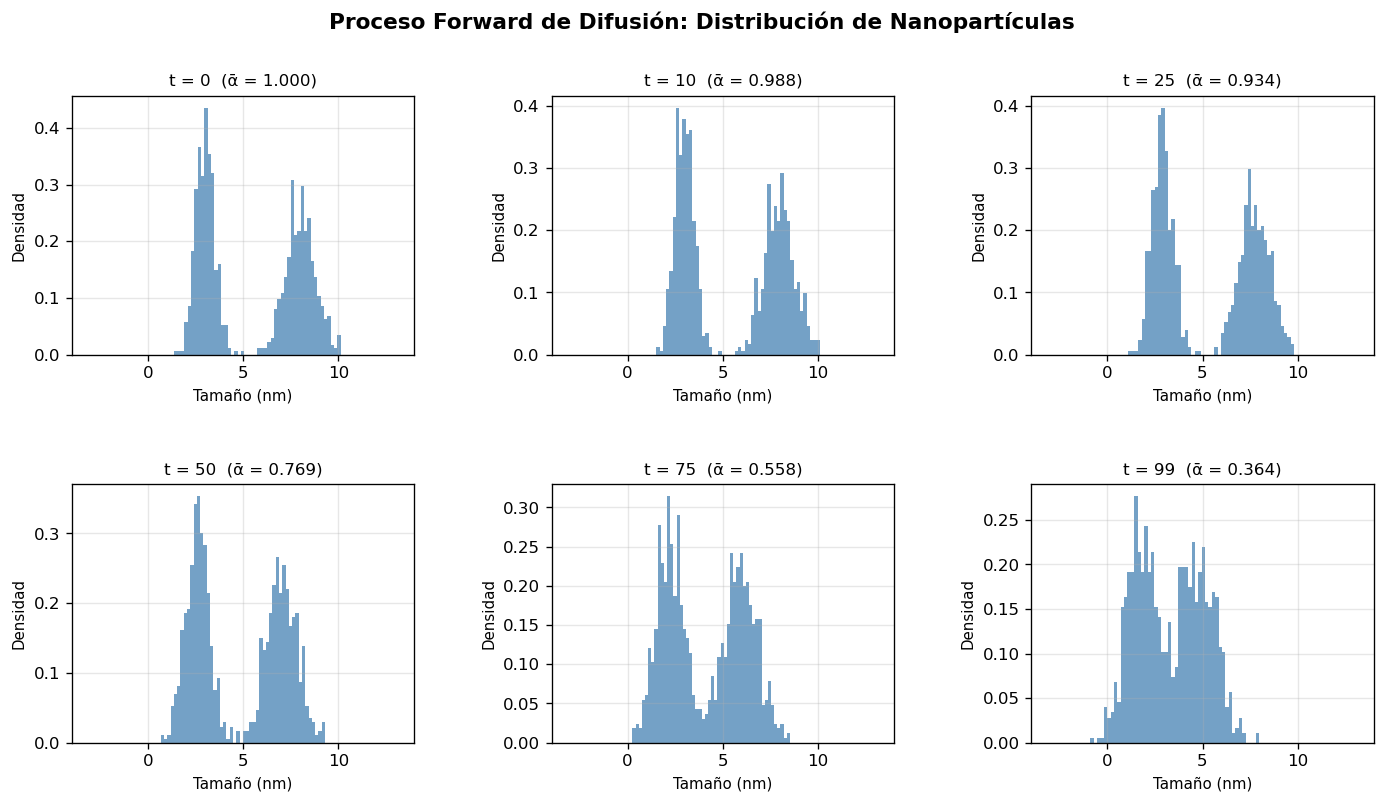

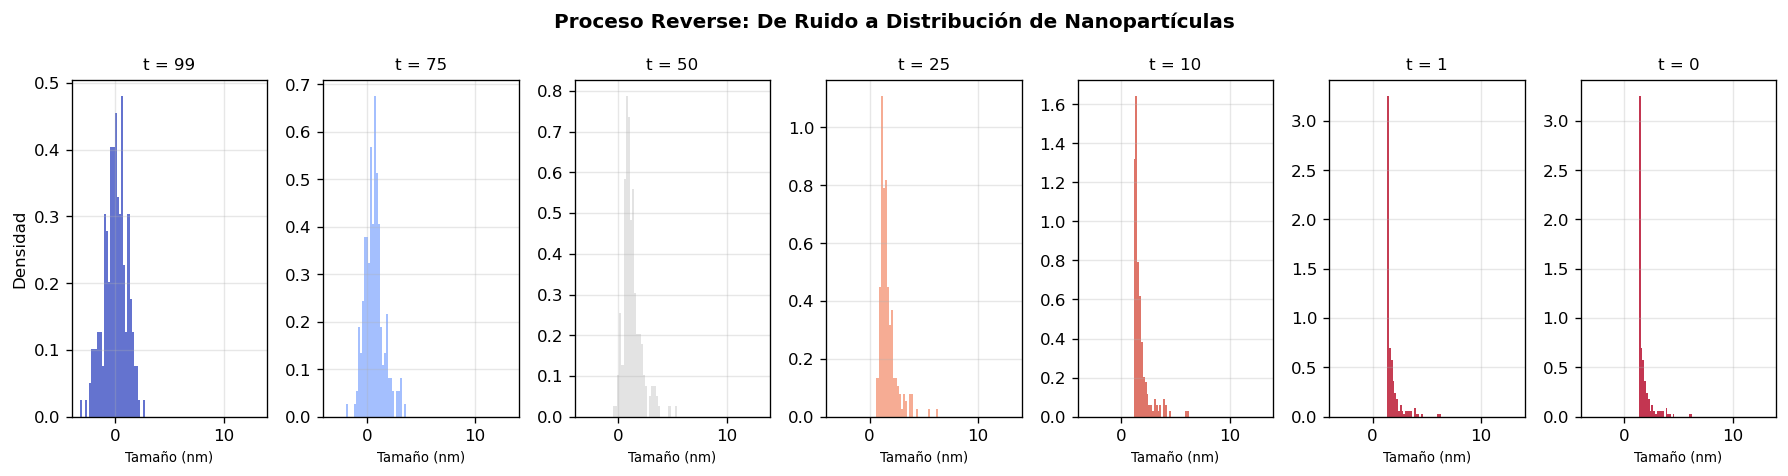


📊 Estadísticas de la distribución generada (reverse final):
  Media:  1.81 nm  (real: 5.51 nm)
  Std:    0.76 nm   (real: 2.59 nm)

💡 En implementación real: la red ε_θ(x_t, t) predice el ruido en cada paso.
   Frameworks: HuggingFace Diffusers, OpenAI improved-diffusion


In [2]:
# ============================================================
# 🌊 Modelo de Difusión (DDPM) — Ejemplo Conceptual 1D en NumPy
# ============================================================
# Muestra el principio del proceso forward/reverse de difusión
# sin necesidad de GPU. En aplicaciones reales (imágenes 2D/3D)
# se usa PyTorch + GPU. Ver: huggingface.co/blog/annotated-diffusion
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

np.random.seed(42)

# ── Hiperparámetros del proceso de difusión ──────────────────
T = 100           # pasos de difusión
beta_start = 1e-4
beta_end   = 0.02
betas = np.linspace(beta_start, beta_end, T)
alphas = 1.0 - betas
alpha_bar = np.cumprod(alphas)   # ᾱ_t = Π_{s=1}^{t} α_s

# ── Datos: distribución de tamaños de nanopartículas (nm) ────
# Mezcla bimodal: NPs pequeñas + NPs grandes
n_samples = 1000
x0_small = np.random.normal(3, 0.5, n_samples // 2)
x0_large = np.random.normal(8, 0.8, n_samples // 2)
x0 = np.concatenate([x0_small, x0_large])  # distribución "real"

# ── Process forward: agregar ruido en t pasos ─────────────────
def forward_diffusion(x0, t):
    '''x_t = sqrt(ᾱ_t) * x0 + sqrt(1 - ᾱ_t) * ε'''
    eps = np.random.normal(0, 1, x0.shape)
    x_t = np.sqrt(alpha_bar[t]) * x0 + np.sqrt(1 - alpha_bar[t]) * eps
    return x_t, eps

# ── Visualizar el proceso forward ─────────────────────────────
timesteps_to_show = [0, 10, 25, 50, 75, 99]
fig = plt.figure(figsize=(14, 7))
gs = GridSpec(2, 3, figure=fig, hspace=0.5, wspace=0.4)

for i, t in enumerate(timesteps_to_show):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    x_t, _ = forward_diffusion(x0, t)
    ax.hist(x_t, bins=50, density=True, alpha=0.75, color='steelblue', edgecolor='none')
    ax.set_title(f't = {t}  (ᾱ = {alpha_bar[t]:.3f})', fontsize=10)
    ax.set_xlabel('Tamaño (nm)', fontsize=9)
    ax.set_ylabel('Densidad', fontsize=9)
    ax.set_xlim(-4, 14)
    ax.grid(True, alpha=0.3)

fig.suptitle('Proceso Forward de Difusión: Distribución de Nanopartículas',
             fontsize=13, fontweight='bold')
plt.savefig('ddpm_forward_process.png', dpi=150, bbox_inches='tight')
plt.show()

# ── Proceso reverse simplificado: denoising iterativo ─────────
# En DDPM real: la red neuronal predice ε en cada paso
# Aquí: aproximamos el reverse con un estimador bayesiano simple

def posterior_mean(x_t, t, x0_estimate):
    '''Media posterior p(x_{t-1} | x_t, x_0) simplificada'''
    coeff_x0 = np.sqrt(alpha_bar[t-1]) * betas[t] / (1 - alpha_bar[t])
    coeff_xt = np.sqrt(alphas[t]) * (1 - alpha_bar[t-1]) / (1 - alpha_bar[t])
    return coeff_x0 * x0_estimate + coeff_xt * x_t

# Simular proceso reverse: del ruido puro a la distribuciön real
n_demo = 200
x_T = np.random.normal(0, 1, n_demo)   # ruido puro (x_T)
x_current = x_T.copy()

# En cada paso removemos ruido gradualmente
snapshots = {99: x_T.copy()}
for t in range(T-1, 0, -1):
    # Estimación naive de x0 (en práctica, la red neuronal hace esto)
    x0_est = (x_current - np.sqrt(1 - alpha_bar[t]) * 0.1) / np.sqrt(alpha_bar[t])
    x0_est = np.clip(x0_est, x0.min(), x0.max())

    mu = posterior_mean(x_current, t, x0_est)
    sigma = np.sqrt(betas[t] * (1 - alpha_bar[t-1]) / (1 - alpha_bar[t]))
    x_current = mu + sigma * np.random.normal(0, 1, n_demo)

    if t in [75, 50, 25, 10, 1]:
        snapshots[t] = x_current.copy()

snapshots[0] = x_current.copy()

# ── Visualizar reverse ─────────────────────────────────────────
fig, axes = plt.subplots(1, len(snapshots), figsize=(15, 4), sharey=False)
for ax, (t, data) in zip(axes, sorted(snapshots.items(), reverse=True)):
    ax.hist(data, bins=30, density=True, alpha=0.8,
            color=plt.cm.coolwarm(1 - t/T), edgecolor='none')
    ax.set_title(f't = {t}', fontsize=10)
    ax.set_xlim(-4, 14)
    ax.set_xlabel('Tamaño (nm)', fontsize=8)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel('Densidad', fontsize=10)
fig.suptitle('Proceso Reverse: De Ruido a Distribución de Nanopartículas',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('ddpm_reverse_process.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Estadísticas de la distribución generada (reverse final):")
print(f"  Media:  {x_current.mean():.2f} nm  (real: {x0.mean():.2f} nm)")
print(f"  Std:    {x_current.std():.2f} nm   (real: {x0.std():.2f} nm)")
print("\n💡 En implementación real: la red ε_θ(x_t, t) predice el ruido en cada paso.")
print("   Frameworks: HuggingFace Diffusers, OpenAI improved-diffusion")


### 🔍 Interpretación: Modelos de Difusión para Nanomateriales

**Proceso forward (forward diffusion):**
- En t=0: distribución bimodal real de nanopartículas (pequeñas ~3nm, grandes ~8nm)
- En t=100: ruido gaussiano puro — toda la estructura se perdió
- El parámetro ᾱ_t controla cuánta señal queda: ᾱ ≈ 1 → casi sin ruido; ᾱ ≈ 0 → ruido puro

**Proceso reverse (denoising):**
- Parte del ruido puro y va recuperando la estructura paso a paso
- En la práctica, una red U-Net aprende a predecir el ruido $\varepsilon$ a remover
- El resultado final aproxima la distribución original

**¿Por qué supera a las GANs en generación de imágenes TEM?**
- Las GANs tienen problemas de *mode collapse* (solo generan pocos tipos de estructuras)
- DDPM genera distribuciones más diversas y realistas
- El entrenamiento es estable (no hay adversario)

**Estado del arte actual:**
- DALL-E 3, Stable Diffusion, Midjourney: todos usan difusión
- En materiales: **DiffCSP** (generación de cristales), **DiMO** (generación de moléculas)


---

## 0.3 Flujo de Trabajo con Redes Neuronales

```mermaid
graph LR
    A["📥 Datos<br/>(imágenes, grafos, tablas)"] --> B["🔧 Preprocesamiento<br/>(normalización, augmentation)"]
    B --> C["🏗️ Arquitectura<br/>(capas, activaciones, dropout)"]
    C --> D["⚡ Inicialización de pesos<br/>(Xavier / He)"]
    D --> E["➡️ Forward pass<br/>(predicción)"]
    E --> F["📉 Función de pérdida<br/>(MSE / CrossEntropy)"]
    F --> G["⬅️ Backward pass<br/>(gradientes via autograd)"]
    G --> H["🔄 Optimizador<br/>(Adam / SGD / RMSProp)"]
    H --> I["📊 Validación por época"]
    I --> J{"Early Stopping?"}
    J -->|No| E
    J -->|Sí| K["🏁 Evaluación final en TEST"]
    K --> L["🔬 Interpretabilidad<br/>(Grad-CAM, SHAP, saliency)"]
```

### Conceptos clave del flujo

| Concepto | Descripción |
|----------|-------------|
| **Época (epoch)** | Una pasada completa por todos los datos de entrenamiento |
| **Batch** | Subconjunto de datos procesado en cada actualización de pesos |
| **Iteración** | Una actualización de pesos (= n_samples / batch_size por época) |
| **Learning rate (η)** | Tamaño del paso en el gradiente descendente |
| **Early stopping** | Detener entrenamiento cuando la pérdida de validación deja de mejorar |
| **Scheduler** | Reduce η durante el entrenamiento (ej. `ReduceLROnPlateau`) |

### Inicialización de pesos

| Activación | Inicialización recomendada | Fórmula |
|------------|--------------------------|---------|
| **Sigmoid / Tanh** | Xavier (Glorot) | $\text{Var}(W) = \frac{2}{n_{in} + n_{out}}$ |
| **ReLU** | He (Kaiming) | $\text{Var}(W) = \frac{2}{n_{in}}$ |

Una mala inicialización causa **vanishing** o **exploding gradients** — el entrenamiento no converge.

---


## 1. Redes Neuronales Feedforward (MLP)

### Arquitectura de un MLP

La arquitectura de un MLP se organiza en capas:

```
Entrada → [Capa Oculta 1] → [Capa Oculta 2] → ... → Salida
  x         σ(W¹x + b¹)      σ(W²h¹ + b²)             ŷ
```

Notación:
- **Input Layer:** Vector de features $\mathbf{x} \in \mathbb{R}^{n}$
- **Hidden Layer(s):** Transformaciones aprendidas con pesos $W^{[l]}$ y sesgos $\mathbf{b}^{[l]}$
- **Output Layer:** Predicción $\hat{y}$ (regresión: lineal; clasificación: softmax/sigmoid)

La profundidad (número de capas) y anchura (neuronas por capa) son los **hiperparámetros** más importantes.


**Neurona artificial:**
$$z = \sum_{i=1}^n w_i x_i + b$$
$$a = \sigma(z)$$

donde σ es la función de activación.

### 2.1.2. Funciones de Activación

| Función | Ecuación | Rango | Uso |
|---------|----------|-------|-----|
| **Sigmoid** | $\sigma(z) = \frac{1}{1+e^{-z}}$ | (0, 1) | Clasificación binaria (output) |
| **Tanh** | $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | (-1, 1) | Capas ocultas |
| **ReLU** | $\text{ReLU}(z) = \max(0, z)$ | [0, ∞) | Capas ocultas (más común) |
| **Leaky ReLU** | $\text{LReLU}(z) = \max(0.01z, z)$ | (-∞, ∞) | Evita "dying ReLU" |
| **Softmax** | $\sigma(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | (0, 1), Σ=1 | Clasificación multiclase |

### 💻 Ejemplo: Visualizar Funciones de Activación

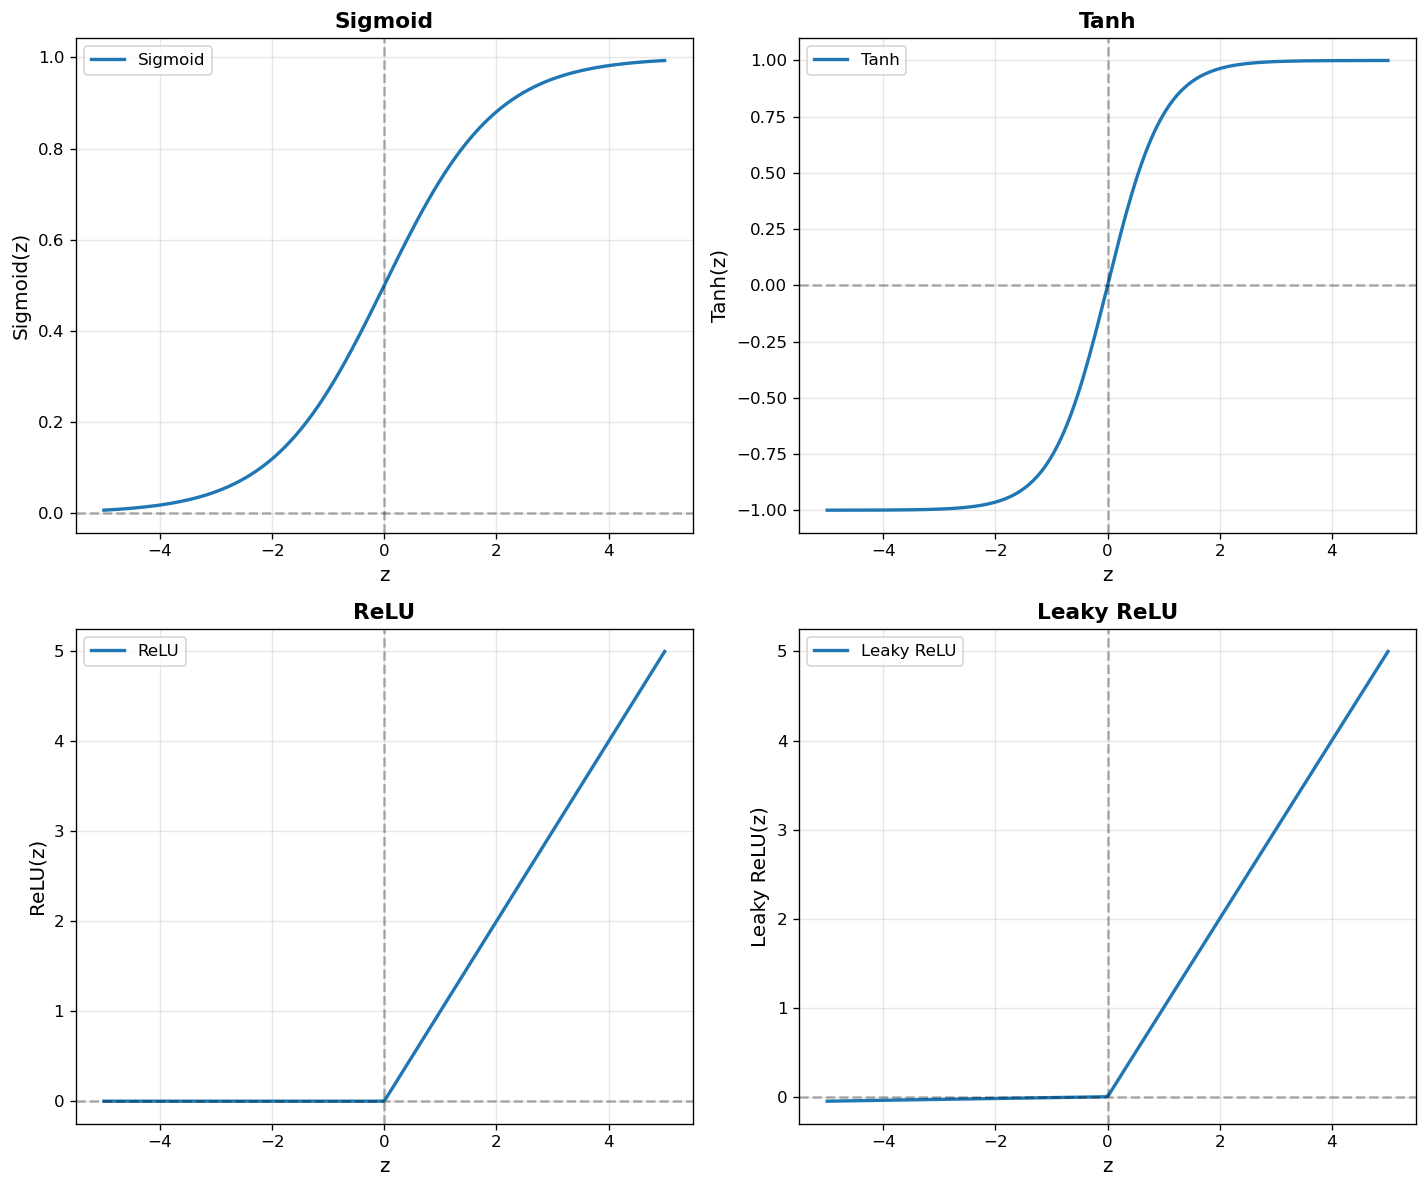

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

# 3. Rango de valores
z = np.linspace(-5, 5, 200)

# 4. Calcular activaciones
activations = {
    'Sigmoid': sigmoid(z),
    'Tanh': tanh(z),
    'ReLU': relu(z),
    'Leaky ReLU': leaky_relu(z)
}

# 5. Visualizar
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, values) in zip(axes, activations.items()):
    ax.plot(z, values, linewidth=2, label=name)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel(f'{name}(z)', fontsize=12)
    ax.set_title(name, fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('activation_functions.png', dpi=300)
plt.show()

## 5.1. Retropropagación (Backpropagation)

Algoritmo para calcular gradientes eficientemente usando la regla de la cadena.

**Forward pass:**
$$a^{[l]} = \sigma(W^{[l]}a^{[l-1]} + b^{[l]})$$

**Backward pass:**
$$\delta^{[l]} = (W^{[l+1]})^T \delta^{[l+1]} \odot \sigma'(z^{[l]})$$

**Actualización de pesos:**
$$W^{[l]} := W^{[l]} - \alpha \frac{\partial L}{\partial W^{[l]}}$$

donde α es la tasa de aprendizaje (learning rate).

### 5.1.1. Función de Pérdida

**Regresión:**
- MSE: $L = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$
- MAE: $L = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$

**Clasificación:**
- Binary Cross-Entropy: $L = -\frac{1}{n}\sum_{i=1}^n [y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$
- Categorical Cross-Entropy: $L = -\sum_{i=1}^n \sum_{c=1}^C y_{i,c} \log(\hat{y}_{i,c})$

## 5.2. Regularización

### 5.2.1. L2 Regularization (Weight Decay)

$$L_{total} = L_{data} + \lambda \sum_{l} \|W^{[l]}\|^2$$

### 5.2.2. Dropout

Durante entrenamiento, "apaga" neuronas aleatoriamente con probabilidad p:

Activaciones originales (primera muestra):
[ 1.764  0.4    0.979  2.241  1.868 -0.977  0.95  -0.151]

Máscara de dropout (1=activo, 0=apagado):
[0 0 1 0 1 0 0 0]

Activaciones con dropout aplicado:
[ 0.     0.     1.957  0.     3.735 -0.     0.    -0.   ]


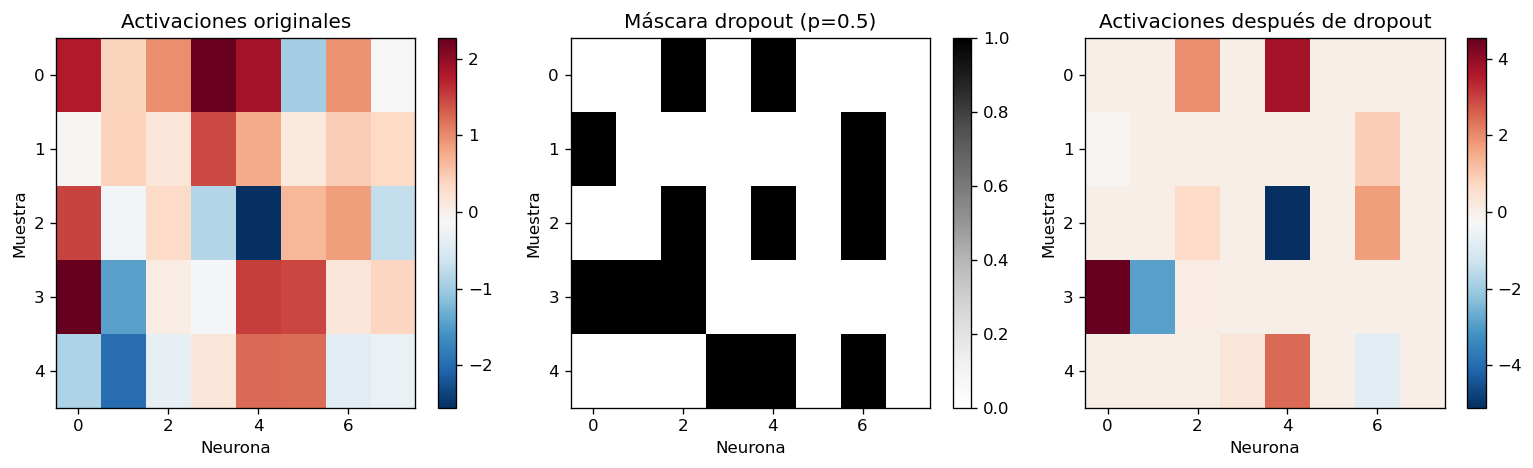


Efecto de regularización:
  Neuronas activas: 32% (esperado: 50%)
  Media activaciones sin dropout: 0.3125
  Media activaciones con dropout: 0.1836 (≈ igual por inverted dropout)


In [4]:
# ============================================================
# Regularización: Dropout
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Simular activaciones de una capa oculta (batch de 5 muestras, 8 neuronas)
np.random.seed(0)
activaciones = np.random.randn(5, 8)   # a: activaciones ANTES de dropout

dropout_rate = 0.5   # probabilidad de "apagar" una neurona

# ─── Dropout en entrenamiento ─────────────────────────────────────────
mask  = np.random.rand(*activaciones.shape) > dropout_rate
a_drop = activaciones * mask / (1 - dropout_rate)   # inverted dropout

print("Activaciones originales (primera muestra):")
print(np.round(activaciones[0], 3))
print("\nMáscara de dropout (1=activo, 0=apagado):")
print(mask[0].astype(int))
print("\nActivaciones con dropout aplicado:")
print(np.round(a_drop[0], 3))

# ─── Dropout en inferencia ────────────────────────────────────────────
# En inferencia: NO se aplica dropout, se usan todas las neuronas
# La escala 1/(1-p) en training asegura que la media sea la misma en test

# ─── Visualización ────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

im0 = axes[0].imshow(activaciones, cmap='RdBu_r', aspect='auto')
axes[0].set_title('Activaciones originales')
axes[0].set_xlabel('Neurona'); axes[0].set_ylabel('Muestra')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(mask.astype(float), cmap='Greys', aspect='auto', vmin=0, vmax=1)
axes[1].set_title(f'Máscara dropout (p={dropout_rate})')
axes[1].set_xlabel('Neurona'); axes[1].set_ylabel('Muestra')
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(a_drop, cmap='RdBu_r', aspect='auto')
axes[2].set_title('Activaciones después de dropout')
axes[2].set_xlabel('Neurona'); axes[2].set_ylabel('Muestra')
plt.colorbar(im2, ax=axes[2])

plt.tight_layout()
plt.savefig('dropout_visualization.png', dpi=150)
plt.show()

print(f"\nEfecto de regularización:")
print(f"  Neuronas activas: {mask.mean()*100:.0f}% (esperado: {(1-dropout_rate)*100:.0f}%)")
print(f"  Media activaciones sin dropout: {activaciones.mean():.4f}")
print(f"  Media activaciones con dropout: {a_drop.mean():.4f} (≈ igual por inverted dropout)")


### 🔍 Interpretación: Dropout como Regularización

**¿Por qué funciona?**
- Al apagar neuronas aleatoriamente, forzamos que cada neurona sea útil independientemente
- Equivale a entrenar un ensemble de $2^n$ redes diferentes (una por combinación de máscara)
- Reduce la **co-adaptación** entre neuronas: ninguna puede depender demasiado de otra

**Inverted Dropout:** Al escalar por $\frac{1}{1-p}$ durante entrenamiento, mantenemos la misma expectativa de activación en test donde **no** se aplica dropout.

**Tasas típicas:**
- Capas densas profundas: $p = 0.3$ – $0.5$
- After embedding layers: $p = 0.1$
- En CNNs: poco común en conv layers (SpatialDropout es mejor)

> 💡 **En materiales:** Dropout es especialmente útil cuando el dataset de propiedades es pequeño (< 1000 estructuras DFT), que es el caso típico.


### 7.0.1. Early Stopping

Detener entrenamiento cuando la pérdida en validación deja de mejorar.

### 💻 Ejemplo: MLP para Regresión de Bandgap

Entrenando MLP...

Iteraciones de entrenamiento: 69
Pérdida final: 0.000922

Resultados en test set:
  R² = 0.9998
  MAE = 1.2202 eV
  RMSE = 1.7398 eV


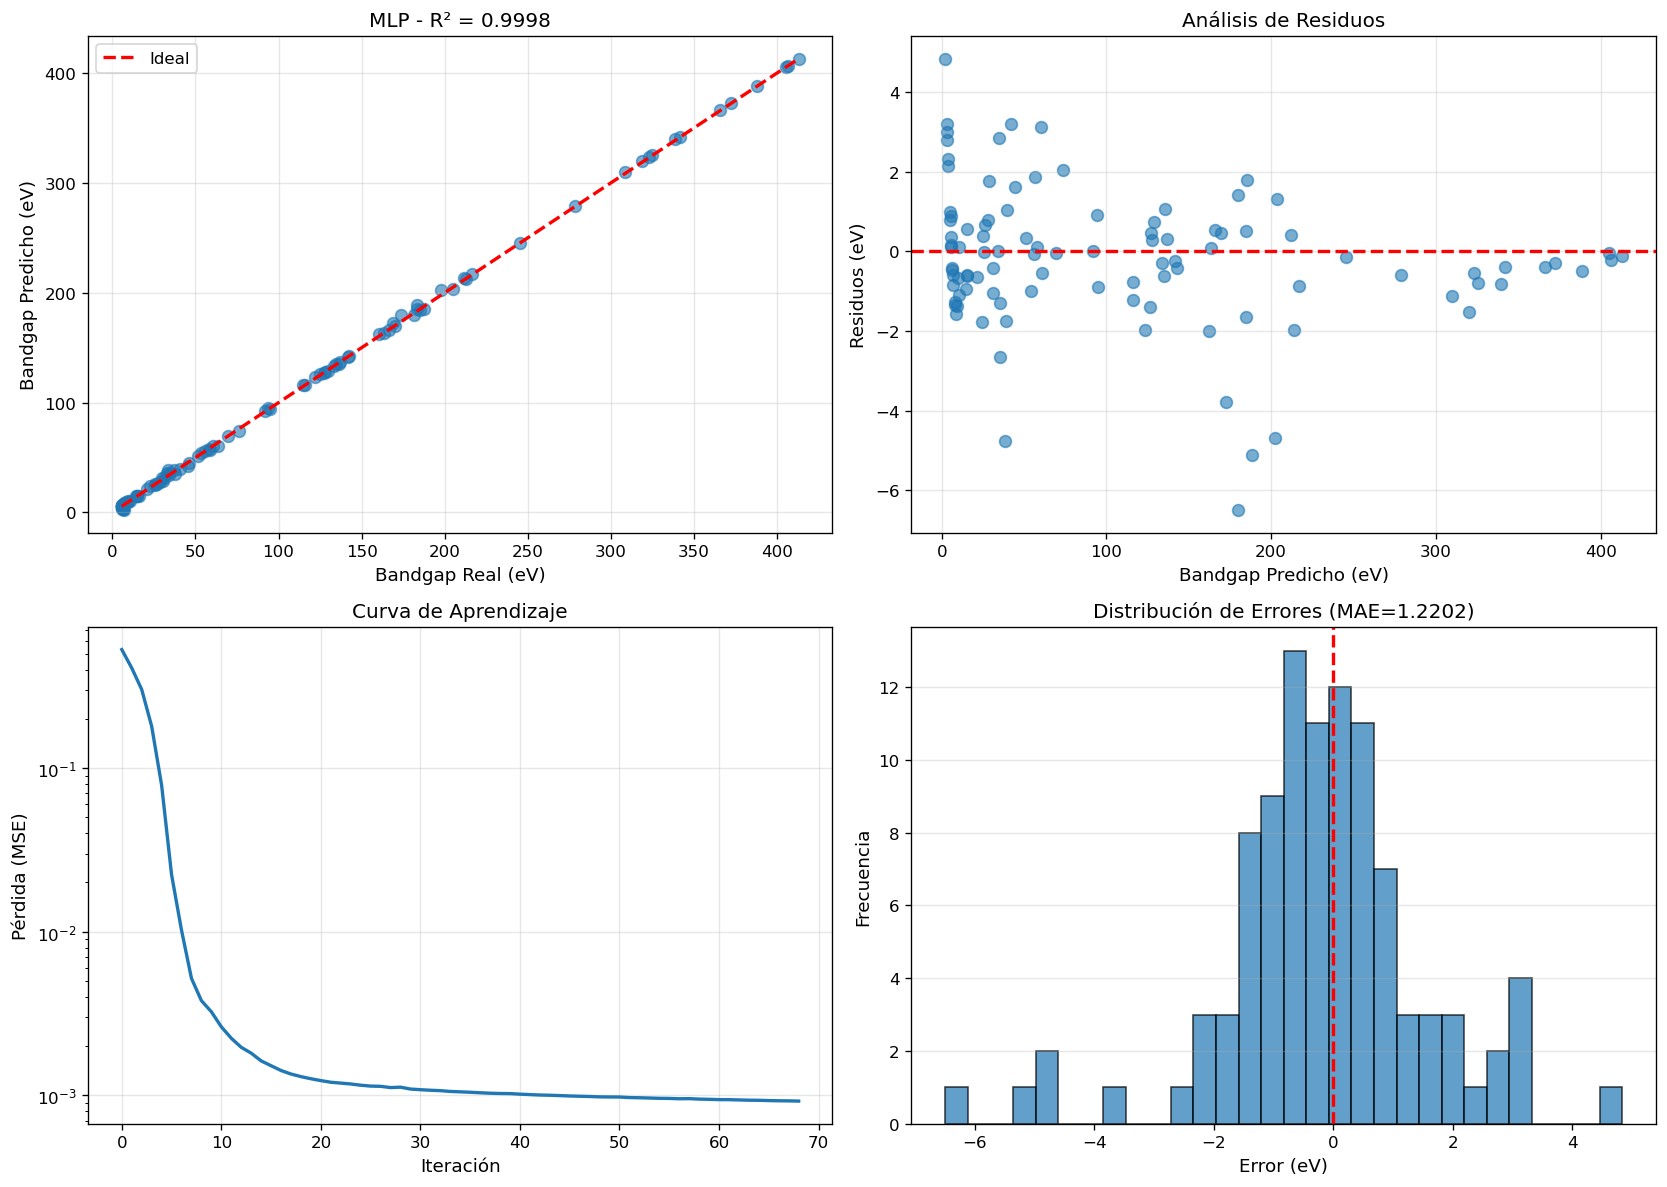

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 8. Generar dataset sintético más complejo
np.random.seed(42)
n_samples = 500

# 9. Features: radio, número de átomos, electronegatividad
radii = np.random.uniform(1, 10, n_samples)
n_atoms = (4 * np.pi * radii**3 / 3 / 0.01).astype(int)  # Aproximado
electronegativity = np.random.uniform(1.5, 2.5, n_samples)

# 10. Target: Bandgap con relación no lineal
Eg = 1.5 + 5/radii**2 + 0.3*electronegativity + 0.001*n_atoms + np.random.normal(0, 0.1, n_samples)

# 11. Crear DataFrame
df = pd.DataFrame({
    'radius': radii,
    'n_atoms': n_atoms,
    'electronegativity': electronegativity,
    'bandgap': Eg
})

# 12. Preparar datos
X = df[['radius', 'n_atoms', 'electronegativity']].values
y = df['bandgap'].values

# 13. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 14. Normalizar
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# 15. Crear y entrenar MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # 3 capas ocultas
    activation='relu',
    solver='adam',
    alpha=0.001,  # L2 regularization
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=50,
    random_state=42,
    verbose=False
)

print("Entrenando MLP...")
mlp.fit(X_train_scaled, y_train_scaled)

print(f"\nIteraciones de entrenamiento: {mlp.n_iter_}")
print(f"Pérdida final: {mlp.loss_:.6f}")

# 16. Predecir
y_pred_scaled = mlp.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 17. Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nResultados en test set:")
print(f"  R² = {r2:.4f}")
print(f"  MAE = {mae:.4f} eV")
print(f"  RMSE = {rmse:.4f} eV")

# 18. Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 19. Predicciones vs reales
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Ideal')
axes[0, 0].set_xlabel('Bandgap Real (eV)', fontsize=11)
axes[0, 0].set_ylabel('Bandgap Predicho (eV)', fontsize=11)
axes[0, 0].set_title(f'MLP - R² = {r2:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 20. Residuos
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Bandgap Predicho (eV)', fontsize=11)
axes[0, 1].set_ylabel('Residuos (eV)', fontsize=11)
axes[0, 1].set_title('Análisis de Residuos')
axes[0, 1].grid(True, alpha=0.3)

# 21. Curva de aprendizaje
axes[1, 0].plot(mlp.loss_curve_, linewidth=2)
axes[1, 0].set_xlabel('Iteración', fontsize=11)
axes[1, 0].set_ylabel('Pérdida (MSE)', fontsize=11)
axes[1, 0].set_title('Curva de Aprendizaje')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 22. Distribución de errores
axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Error (eV)', fontsize=11)
axes[1, 1].set_ylabel('Frecuencia', fontsize=11)
axes[1, 1].set_title(f'Distribución de Errores (MAE={mae:.4f})')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('mlp_regression.png', dpi=300)
plt.show()

---

# 23. Redes Neuronales Profundas

## 23.1. Redes Convolucionales (CNN)

Especializadas en datos con estructura espacial (imágenes).

### 23.1.1. Capas Principales

**1. Convolución:**
$$y_{i,j} = \sum_m \sum_n w_{m,n} \cdot x_{i+m, j+n} + b$$

**2. Pooling:**
- Max pooling: $y = \max(x_{región})$
- Average pooling: $y = \text{mean}(x_{región})$

**3. Fully Connected:**
- Capa densa estándar

### 23.1.2. Aplicación en Nanotecnología

- Análisis de imágenes TEM/SEM
- Clasificación de nanopartículas
- Detección de defectos
- Segmentación de estructuras

### 💻 Ejemplo: CNN para Clasificación de Imágenes de Microscopía

Dataset shape: (1000, 64, 64, 1)
Train: (800, 64, 64, 1), Test: (200, 64, 64, 1)

Arquitectura del modelo:


c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,329 (794.25 KB)

 Trainable params: 203,329 (794.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9688 - loss: 0.1731 - val_accuracy: 1.0000 - val_loss: 1.7981e-06
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 1.0000 - loss: 2.4662e-05 - val_accuracy: 1.0000 - val_loss: 1.7367e-10
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 1.0000 - loss: 1.4368e-06 - val_accuracy: 1.0000 - val_loss: 2.8743e-11
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 1.0000 - loss: 2.1324e-05 - val_accuracy: 1.0000 - val_loss: 1.3949e-11
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 1.0000 - loss: 2.4918e-05 - val_accuracy: 1.0000 - val_loss: 1.2260e-11
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 1.0000 - loss: 4.1171e-07 - val_accuracy: 1.0000 - val_loss: 1.2690e-11
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 1.0000 - loss: 1.8767e-07 - val_accuracy: 1.0000 - val_loss: 1.2653e-11
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step 

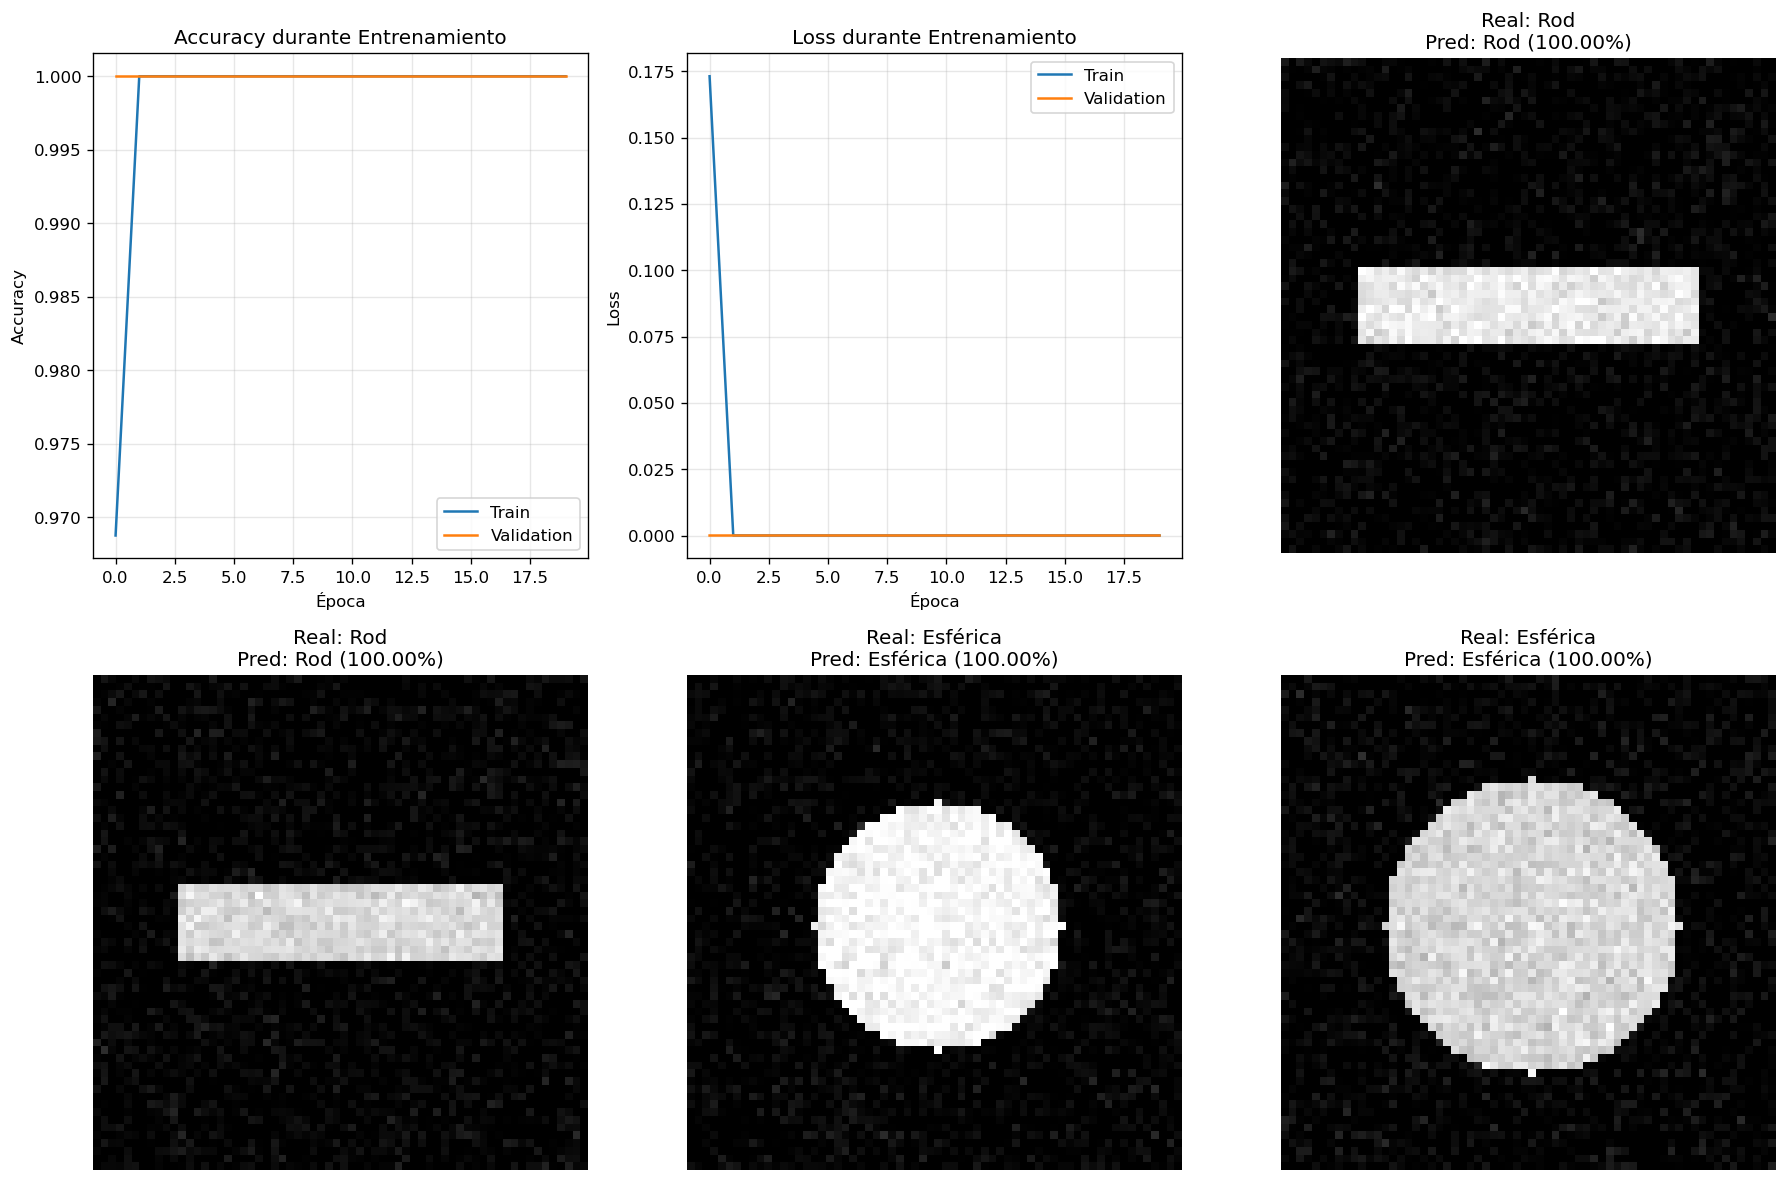

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# 24. Generar imágenes sintéticas de nanopartículas
def generate_nanoparticle_image(size=64, particle_type='spherical'):
    """Genera imagen sintética de nanopartícula"""
    img = np.zeros((size, size))
    center = size // 2
    
    if particle_type == 'spherical':
        # Partícula esférica
        radius = np.random.randint(10, 20)
        y, x = np.ogrid[:size, :size]
        mask = (x - center)**2 + (y - center)**2 <= radius**2
        img[mask] = np.random.uniform(0.7, 1.0)
        
    elif particle_type == 'rod':
        # Nanorod
        length = np.random.randint(30, 45)
        width = np.random.randint(8, 12)
        start = center - length // 2
        end = center + length // 2
        img[center-width//2:center+width//2, start:end] = np.random.uniform(0.7, 1.0)
    
    # Añadir ruido
    img += np.random.normal(0, 0.05, (size, size))
    img = np.clip(img, 0, 1)
    
    return img

# 25. Generar dataset
n_samples = 1000
images = []
labels = []

for _ in range(n_samples // 2):
    images.append(generate_nanoparticle_image(particle_type='spherical'))
    labels.append(0)
    images.append(generate_nanoparticle_image(particle_type='rod'))
    labels.append(1)

X = np.array(images).reshape(-1, 64, 64, 1)  # Añadir canal
y = np.array(labels)

# 26. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 27. Construir CNN
model = keras.Sequential([
    # Bloque 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Bloque 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Bloque 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Clasificador
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nArquitectura del modelo:")
model.summary()

# 28. Entrenar
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 29. Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 30. Visualización
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 31. Curvas de entrenamiento
axes[0, 0].plot(history.history['accuracy'], label='Train')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy durante Entrenamiento')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history.history['loss'], label='Train')
axes[0, 1].plot(history.history['val_loss'], label='Validation')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Loss durante Entrenamiento')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 32. Ejemplos de predicciones
y_pred = model.predict(X_test[:4])
for i in range(4):
    ax = axes[(i+2)//3, (i+2)%3]
    ax.imshow(X_test[i].squeeze(), cmap='gray')
    true_label = 'Esférica' if y_test[i] == 0 else 'Rod'
    pred_label = 'Esférica' if y_pred[i] < 0.5 else 'Rod'
    confidence = (1 - y_pred[i][0]) if y_pred[i] < 0.5 else y_pred[i][0]
    ax.set_title(f'Real: {true_label}\nPred: {pred_label} ({confidence:.2%})')
    ax.axis('off')

plt.tight_layout()
plt.savefig('cnn_classification.png', dpi=300)
plt.show()

In [8]:
# ============================================================
# ⚠️  DEPENDENCIAS: Graph Neural Networks
# ============================================================
# Esta sección requiere PyTorch + torch-geometric
#
# Para instalar en Google Colab (con GPU T4 recomendada):
# !pip install torch --index-url https://download.pytorch.org/whl/cu118 -q
# !pip install torch_geometric torch_scatter torch_sparse -q
#
# En CPU (más lento pero funcional):
# !pip install torch -q
# !pip install torch_geometric -q
#
# Si no tienes instalación, el código GNN está en una celda
# protegida con try/except — el resto del notebook sigue funcionando.
# ============================================================

try:
    import torch
    import torch_geometric
    print(f"✅ PyTorch {torch.__version__}")
    print(f"✅ torch-geometric {torch_geometric.__version__}")
    TORCH_GEO_AVAILABLE = True
except ImportError:
    print("⚠️  torch-geometric no está instalado.")
    print("   El ejemplo GNN está protegido — puedes continuar con el resto.")
    TORCH_GEO_AVAILABLE = False


⚠️  torch-geometric no está instalado.
   El ejemplo GNN está protegido — puedes continuar con el resto.


## 32.1. Graph Neural Networks (GNN)

Especializadas en datos con estructura de grafo (moléculas, cristales).

### 32.1.1. Representación de Moléculas como Grafos

- **Nodos:** Átomos (features: tipo, carga, hibridación)
- **Aristas:** Enlaces (features: tipo, longitud)

### 32.1.2. Message Passing

$$h_v^{(k+1)} = \text{UPDATE}^{(k)}\left(h_v^{(k)}, \text{AGGREGATE}^{(k)}\left(\{h_u^{(k)} : u \in \mathcal{N}(v)\}\right)\right)$$

### 💻 Ejemplo Conceptual: GNN con PyTorch Geometric

In [9]:
# 33. Ejemplo conceptual (requiere torch_geometric)
"""
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch
import torch.nn.functional as F

# 34. Crear grafo molecular simple (metano CH4)
# 35. Nodos: C, H, H, H, H
x = torch.tensor([
    [6],  # Carbono
    [1],  # Hidrógeno
    [1],
    [1],
    [1]
], dtype=torch.float)

# 36. Aristas (bidireccionales)
edge_index = torch.tensor([
    [0, 1, 0, 2, 0, 3, 0, 4, 1, 0, 2, 0, 3, 0, 4, 0],
    [1, 0, 2, 0, 3, 0, 4, 0, 0, 1, 0, 2, 0, 3, 0, 4]
], dtype=torch.long)

# 37. Crear objeto Data
data = Data(x=x, edge_index=edge_index)

# 38. Modelo GNN simple
class SimpleGNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 16)
        self.lin = torch.nn.Linear(16, 1)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        # Message passing
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        
        # Readout (global pooling)
        x = torch.mean(x, dim=0)
        
        # Predicción
        x = self.lin(x)
        return x

model = SimpleGNN()
output = model(data)
print(f"Predicción para molécula: {output.item():.4f}")
"""

print("Ejemplo conceptual de GNN")
print("GNNs son ideales para:")
print("  - Predicción de propiedades moleculares")
print("  - Generación de moléculas")
print("  - Predicción de reactividad")
print("  - Diseño de materiales cristalinos")

Ejemplo conceptual de GNN
GNNs son ideales para:
  - Predicción de propiedades moleculares
  - Generación de moléculas
  - Predicción de reactividad
  - Diseño de materiales cristalinos


---

# 39. 📝 PRÁCTICA 3: ML para Predicción de Propiedades

## 39.1. Objetivos

1. Crear dataset de nanomateriales con descriptores
2. Entrenar modelos de regresión y clasificación
3. Comparar diferentes algoritmos
4. Optimizar hiperparámetros
5. Validar modelos correctamente

## 39.2. Ejercicio 3.1: Dataset y Descriptores

In [ ]:
#pip install ase

from ase.cluster import Icosahedron
from ase.cluster.octahedron import Octahedron
from ase.build import fcc111, fcc110, fcc100
from ase.calculators.emt import EMT
from ase.optimize import BFGS
from ase.neighborlist import NeighborList
from ase.data import covalent_radii, atomic_numbers
import numpy as np
import pandas as pd
import warnings
import time
from tqdm import tqdm  # Para barra de progreso
warnings.filterwarnings('ignore')

def calculate_all_descriptors(atoms):
    """Calcula conjunto completo de descriptores con manejo de errores"""
    try:
        atoms.calc = EMT()

        # Optimización con límite de pasos
        opt = BFGS(atoms, logfile=None)
        opt.run(fmax=0.05, steps=50)  # Límite de pasos para evitar loops infinitos

        # Geométricos
        positions = atoms.get_positions()
        center = positions.mean(axis=0)
        distances = np.linalg.norm(positions - center, axis=1)

        # Manejar caso de 1 átomo (distancia = 0)
        if len(atoms) == 1:
            radius_mean = 0.0
            radius_std = 0.0
            radius_max = 0.0
            asphericity = 0.0
        else:
            radius_mean = distances.mean()
            radius_std = distances.std()
            radius_max = distances.max()
            asphericity = radius_std / radius_mean if radius_mean > 0 else 0.0

        # Coordinación - usando cutoff basado en elemento
        # Obtener radio covalente del elemento
        symbol = atoms.get_chemical_symbols()[0]
        atomic_num = atomic_numbers[symbol]
        covalent_radius = covalent_radii[atomic_num]  # en Å
        
        # Cutoff = 1.2 * 2 * radio covalente (para átomos iguales)
        cutoff = 2.4 * covalent_radius
        
        cutoffs = [cutoff] * len(atoms)
        nl = NeighborList(cutoffs, self_interaction=False, bothways=True)
        nl.update(atoms)

        coordinations = [len(nl.get_neighbors(i)[0]) for i in range(len(atoms))]

        # Superficie - basada en coordinación
        if len(atoms) > 1:
            max_coord = max(coordinations)
            # Átomos de superficie: coordinación < 0.9 * máxima coordinación
            surface_atoms = [i for i, c in enumerate(coordinations) 
                           if c < 0.9 * max_coord]
            n_surface = len(surface_atoms)
            surface_fraction = n_surface / len(atoms)
        else:
            surface_fraction = 1.0

        # Energéticos
        E_total = atoms.get_potential_energy()
        E_per_atom = E_total / len(atoms)

        return {
            'n_atoms': len(atoms),
            'radius_mean': radius_mean,
            'radius_std': radius_std,
            'radius_max': radius_max,
            'asphericity': asphericity,
            'coordination_mean': np.mean(coordinations),
            'coordination_std': np.std(coordinations),
            'coordination_min': np.min(coordinations),
            'coordination_max': np.max(coordinations),
            'surface_fraction': surface_fraction,
            'energy_per_atom': E_per_atom,
            'energy_total': E_total
        }
    except Exception as e:
        print(f"  Error en cálculo: {e}")
        return None

def create_fcc_cluster_simple(element, size):
    """Crea un clúster FCC simple usando superficies"""
    try:
        # Parámetros de red aproximados para cada elemento
        lattice_constants = {
            'Au': 4.08, 'Ag': 4.09, 'Cu': 3.61, 
            'Pd': 3.89, 'Pt': 3.92
        }
        
        a = lattice_constants.get(element, 4.0)
        
        # Crear diferentes tipos de clusters FCC según el tamaño
        if size == 1:
            # Para size=1, crear un octaedro pequeño
            atoms = Octahedron(element, length=2, cutoff=1, latticeconstant=a)
        elif size == 2:
            # Para size=2, crear una superficie 111
            atoms = fcc111(element, size=(2, 2, 2), a=a)
        elif size == 3:
            # Para size=3, crear superficie 100
            atoms = fcc100(element, size=(3, 3, 2), a=a)
        else:  # size == 4
            # Para size=4, crear superficie 110
            atoms = fcc110(element, size=(4, 4, 2), a=a)
        
        return atoms
    except Exception as e:
        print(f"  Error creando FCC para {element} (size {size}): {e}")
        return None

def calculate_melting_point(element, radius_mean, n_atoms):
    """Calcula punto de fusión simulado con fórmula más realista"""
    base_mp = {'Au': 1337, 'Ag': 1235, 'Cu': 1358, 'Pd': 1828, 'Pt': 2041}
    
    if n_atoms == 1:
        return base_mp[element] * 0.5  # Átomo aislado funde a menor temperatura
    
    if radius_mean > 0.5:  # Evitar división por valores muy pequeños
        # Modelo de Pawlow: Tm = Tm_bulk * (1 - α/R)
        alpha = 2.0  # Constante ajustable
        tm = base_mp[element] * (1 - alpha / radius_mean)
        return max(tm, base_mp[element] * 0.3)  # Límite inferior
    else:
        return base_mp[element] * 0.6

# Generar dataset completo
print("="*60)
print("🔬 GENERANDO DATASET DE NANOPARTÍCULAS")
print("="*60)

data = []

elements = ['Au', 'Ag', 'Cu', 'Pd', 'Pt']
geometries = ['icosahedron', 'fcc']
shells = [1, 2, 3, 4]

total_iterations = len(elements) * len(geometries) * len(shells)
start_time = time.time()
successful = 0

with tqdm(total=total_iterations, desc="Generando nanopartículas") as pbar:
    for element in elements:
        for noshells in shells:
            for geom in geometries:
                try:
                    if geom == 'icosahedron':
                        # Icosahedron funciona bien
                        atoms = Icosahedron(element, noshells=noshells)
                    else:  # fcc
                        # Usar nuestro método simplificado para FCC
                        atoms = create_fcc_cluster_simple(element, noshells)
                        
                    if atoms is None:
                        pbar.update(1)
                        continue

                    desc = calculate_all_descriptors(atoms)
                    
                    if desc is not None:
                        desc['element'] = element
                        desc['geometry'] = geom
                        desc['noshells'] = noshells
                        
                        # Calcular punto de fusión simulado
                        desc['melting_point'] = calculate_melting_point(
                            element, desc['radius_mean'], desc['n_atoms']
                        )
                        
                        # Añadir información adicional útil
                        desc['element_group'] = 'noble' if element in ['Au', 'Ag', 'Cu'] else 'platinum_group'
                        
                        data.append(desc)
                        successful += 1
                    
                    pbar.set_postfix({
                        'elem': element, 
                        'geom': geom[:3], 
                        'n': noshells,
                        'átomos': len(atoms) if atoms else 0,
                        'ok': successful
                    })
                    
                except Exception as e:
                    print(f"\nError con {element} {geom} {noshells}: {type(e).__name__} - {e}")
                
                pbar.update(1)

# Crear DataFrame solo si hay datos
if len(data) > 0:
    df = pd.DataFrame(data)
    
    # Añadir estadísticas derivadas (solo si las columnas existen)
    if 'energy_per_atom' in df.columns and 'n_atoms' in df.columns:
        df['energy_stability'] = -df['energy_per_atom'] / df['n_atoms']
    
    if 'n_atoms' in df.columns:
        df['log_n_atoms'] = np.log(df['n_atoms'])
    
    if 'coordination_mean' in df.columns:
        df['compactness'] = df['coordination_mean'] / 12.0
    
    # Reordenar columnas (solo las que existen)
    base_cols = ['element', 'geometry', 'noshells', 'n_atoms']
    geo_cols = [c for c in ['radius_mean', 'radius_std', 'radius_max', 'asphericity'] if c in df.columns]
    coord_cols = [c for c in ['coordination_mean', 'coordination_std', 'coordination_min', 'coordination_max'] if c in df.columns]
    surf_cols = [c for c in ['surface_fraction'] if c in df.columns]
    energy_cols = [c for c in ['energy_per_atom', 'energy_total', 'energy_stability'] if c in df.columns]
    other_cols = [c for c in ['melting_point', 'element_group', 'compactness', 'log_n_atoms'] if c in df.columns]
    
    column_order = base_cols + geo_cols + coord_cols + surf_cols + energy_cols + other_cols
    df = df[[c for c in column_order if c in df.columns]]
    
    # Guardar dataset
    df.to_csv('nanomaterials_full_dataset.csv', index=False)
    
    print("\n" + "="*60)
    print("✅ DATASET GENERADO EXITOSAMENTE")
    print("="*60)
    print(f"\n📊 Dimensiones del dataset: {df.shape}")
    print(f"📋 Columnas: {len(df.columns)}")
    print(f"🔢 Total de nanopartículas: {len(df)}")
    print(f"✅ Generadas exitosamente: {successful}/{total_iterations}")
    
    if 'n_atoms' in df.columns:
        print(f"⚛️ Rango de tamaños: {df['n_atoms'].min()} - {df['n_atoms'].max()} átomos")
    
    print(f"⏱️ Tiempo total: {time.time() - start_time:.2f} segundos")
    
    print("\n📋 Primeras 5 muestras:")
    print(df.head())
    
    print("\n📊 Estadísticas descriptivas:")
    print(df.describe())
    
    print("\n📊 Distribución por elemento:")
    print(df['element'].value_counts())
    
    print("\n📊 Distribución por geometría:")
    print(df['geometry'].value_counts())
    
    # Visualización rápida (solo si hay matplotlib)
    try:
        import matplotlib.pyplot as plt
        
        # Determinar cuántos subplots podemos crear
        n_cols = 3
        n_rows = 2
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
        axes = axes.flatten()
        plot_idx = 0
        
        # Distribución de tamaños
        if 'n_atoms' in df.columns:
            axes[plot_idx].hist(df['n_atoms'], bins=20, edgecolor='black')
            axes[plot_idx].set_xlabel('Número de átomos')
            axes[plot_idx].set_ylabel('Frecuencia')
            axes[plot_idx].set_title('Distribución de Tamaños')
            plot_idx += 1
        
        # Punto de fusión vs tamaño
        if 'melting_point' in df.columns and 'n_atoms' in df.columns and plot_idx < len(axes):
            for element in elements:
                mask = df['element'] == element
                if mask.any():
                    axes[plot_idx].scatter(df.loc[mask, 'n_atoms'], df.loc[mask, 'melting_point'], 
                                          label=element, alpha=0.7)
            axes[plot_idx].set_xlabel('Número de átomos')
            axes[plot_idx].set_ylabel('Punto de fusión (K)')
            axes[plot_idx].set_title('Punto de fusión vs Tamaño')
            axes[plot_idx].legend()
            axes[plot_idx].set_xscale('log')
            plot_idx += 1
        
        # Energía por átomo vs coordinación
        if 'energy_per_atom' in df.columns and 'coordination_mean' in df.columns and plot_idx < len(axes):
            for element in elements:
                mask = df['element'] == element
                if mask.any():
                    axes[plot_idx].scatter(df.loc[mask, 'coordination_mean'], 
                                          df.loc[mask, 'energy_per_atom'], 
                                          label=element, alpha=0.7)
            axes[plot_idx].set_xlabel('Coordinación media')
            axes[plot_idx].set_ylabel('Energía por átomo (eV)')
            axes[plot_idx].set_title('Energía vs Coordinación')
            axes[plot_idx].legend()
            plot_idx += 1
        
        # Fracción de superficie vs tamaño
        if 'surface_fraction' in df.columns and 'n_atoms' in df.columns and plot_idx < len(axes):
            axes[plot_idx].scatter(df['n_atoms'], df['surface_fraction'], alpha=0.5)
            axes[plot_idx].set_xlabel('Número de átomos')
            axes[plot_idx].set_ylabel('Fracción de superficie')
            axes[plot_idx].set_title('Fracción de superficie vs Tamaño')
            axes[plot_idx].set_xscale('log')
            plot_idx += 1
        
        # Boxplot de coordinación por geometría
        if 'coordination_mean' in df.columns and 'geometry' in df.columns and plot_idx < len(axes):
            df.boxplot(column='coordination_mean', by='geometry', ax=axes[plot_idx])
            axes[plot_idx].set_title('Coordinación por Geometría')
            axes[plot_idx].set_xlabel('Geometría')
            axes[plot_idx].set_ylabel('Coordinación media')
            plot_idx += 1
        
        # Asphericidad vs tamaño
        if 'asphericity' in df.columns and 'n_atoms' in df.columns and plot_idx < len(axes):
            axes[plot_idx].scatter(df['n_atoms'], df['asphericity'], alpha=0.5)
            axes[plot_idx].set_xlabel('Número de átomos')
            axes[plot_idx].set_ylabel('Asphericidad')
            axes[plot_idx].set_title('Asphericidad vs Tamaño')
            axes[plot_idx].set_xscale('log')
            plot_idx += 1
        
        # Ocultar ejes no utilizados
        for i in range(plot_idx, len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.savefig('nanoparticles_visualization.png', dpi=150)
        plt.show()
        
        print("\n📊 Gráfico guardado como 'nanoparticles_visualization.png'")
        
    except Exception as e:
        print(f"\n⚠️ No se pudieron generar gráficos: {e}")
    
    print("\n" + "="*60)
    print("🚀 LISTO PARA MACHINE LEARNING")
    print("="*60)
    print("\nEjemplo de features para ML:")
    feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean',
                    'coordination_std', 'surface_fraction']
    feature_cols = [f for f in feature_cols if f in df.columns]
    print(feature_cols)

else:
    print("\n❌ No se pudo generar ningún dato. Revisa los errores.")

## 40.1. Ejercicio 3.2: Comparación de Modelos

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore', category=UserWarning)

# ── Verificar/Cargar datos ────────────────────────────────────
# Intentar con diferentes nombres posibles
possible_files = ['nanoparticles_dataset.csv', 'nanomaterials_full_dataset.csv', 'nanoparticles.csv']

df = None
for file in possible_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        print(f"✅ Archivo cargado: {file}")
        break

# Si no existe ningún archivo, crear datos de ejemplo
if df is None:
    print("⚠️ No se encontró el archivo. Generando datos de ejemplo...")
    
    # Crear datos sintéticos para demostración
    np.random.seed(42)
    n_samples = 100
    
    n_atoms = np.random.choice([13, 55, 147, 309, 561], n_samples)
    radius_mean = 2.5 * (n_atoms ** (1/3)) + np.random.normal(0, 0.5, n_samples)
    radius_std = 0.3 * radius_mean * np.random.uniform(0.5, 1.5, n_samples)
    coordination_mean = 12 * (1 - 2/(n_atoms**(1/3))) + np.random.normal(0, 0.5, n_samples)
    coordination_std = 2 * np.random.uniform(0.5, 2, n_samples)
    surface_fraction = 4/(n_atoms**(1/3)) + np.random.normal(0, 0.02, n_samples)
    surface_fraction = np.clip(surface_fraction, 0, 1)
    
    # Punto de fusión simulado (modelo de Pawlow)
    base_mp = np.random.choice([1337, 1235, 1358, 1828, 2041], n_samples)  # Diferentes elementos
    melting_point = base_mp * (1 - 2/radius_mean) + np.random.normal(0, 50, n_samples)
    
    df = pd.DataFrame({
        'n_atoms': n_atoms,
        'radius_mean': radius_mean,
        'radius_std': radius_std,
        'coordination_mean': coordination_mean,
        'coordination_std': coordination_std,
        'surface_fraction': surface_fraction,
        'melting_point': melting_point
    })
    
    print(f"✅ Datos de ejemplo generados: {len(df)} muestras")

# ── Features y limpieza ───────────────────────────────────────
feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean',
                'coordination_std', 'surface_fraction']

# Verificar que todas las columnas existen
available_cols = [col for col in feature_cols if col in df.columns]
missing_cols = set(feature_cols) - set(available_cols)
if missing_cols:
    print(f"⚠️ Columnas faltantes: {missing_cols}")
    print("Usando columnas disponibles:", available_cols)

if 'melting_point' not in df.columns:
    raise ValueError("La columna 'melting_point' no existe en el dataset")

df_clean = df[available_cols + ['melting_point']].copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)

print(f"\n📊 Estadísticas del dataset:")
print(f"   Filas originales: {len(df)}")
print(f"   Filas limpias: {len(df_clean)}")
print(f"   Features usados: {available_cols}")

# Verificar que hay suficientes datos
if len(df_clean) < 10:
    raise ValueError(f"Dataset demasiado pequeño: {len(df_clean)} muestras")

X = df_clean[available_cols].values
y = df_clean['melting_point'].values

print(f"\n   Rango de y: [{y.min():.1f}, {y.max():.1f}]")
print(f"   Inf en y: {np.isinf(y).sum()}")

# ── Modelos ───────────────────────────────────────────────────
models = {
    'Ridge (baseline)':  Ridge(alpha=1.0),
    'Lasso':             Lasso(alpha=0.1, max_iter=10000),
    'KNN (K=5)':         KNeighborsRegressor(n_neighbors=5),
    'SVM-RBF':           SVR(kernel='rbf', C=10, gamma='scale'),
    'Decision Tree':     DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest':     RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Grad. Boosting':    GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP':               MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000,
                                      random_state=42, early_stopping=True),
}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ── Evaluacion ────────────────────────────────────────────────
results = {}
print(f"\n{'Modelo':<22} {'R2 media':>10} {'R2 std':>8} {'Tiempo (s)':>12}")
print("-" * 56)

for name, model in models.items():
    try:
        t0 = time.time()
        scores = cross_val_score(model, X_scaled, y, cv=min(5, len(df_clean)//2),
                                 scoring='r2', n_jobs=-1)
        mae_scores = cross_val_score(model, X_scaled, y, cv=min(5, len(df_clean)//2),
                                     scoring='neg_mean_absolute_error', n_jobs=-1)
        rmse_scores = cross_val_score(model, X_scaled, y, cv=min(5, len(df_clean)//2),
                                      scoring='neg_root_mean_squared_error', n_jobs=-1)
        elapsed = time.time() - t0

        results[name] = {
            'R2_mean': scores.mean(), 'R2_std': scores.std(),
            'MAE': -mae_scores.mean(),
            'RMSE': -rmse_scores.mean(),
            'time': elapsed
        }
        print(f"  {name:<20} {scores.mean():>10.4f} {scores.std():>8.4f} {elapsed:>12.2f}")
    except Exception as e:
        print(f"  {name:<20} {'ERROR':>10} {str(e)[:30]:>20}")

# ── Tabla resumen ─────────────────────────────────────────────
if results:
    print("\n" + "="*70)
    print("📊 TABLA RESUMEN")
    print("="*70)
    print(f"{'Modelo':<22} {'R²':>8} {'MAE (K)':>10} {'RMSE (K)':>10} {'t (s)':>8}")
    print("-" * 62)
    
    for name, r in sorted(results.items(), key=lambda x: -x[1]['R2_mean']):
        print(f"  {name:<20} {r['R2_mean']:>8.4f} {r['MAE']:>10.1f} {r['RMSE']:>10.1f} {r['time']:>8.2f}")

    # ── Graficas ──────────────────────────────────────────────────
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    names = list(results.keys())
    r2s = [results[n]['R2_mean'] for n in names]
    r2_std = [results[n]['R2_std'] for n in names]

    sorted_idx = np.argsort(r2s)[::-1]
    names_s = [names[i] for i in sorted_idx]
    r2s_s = [r2s[i] for i in sorted_idx]
    r2_std_s = [r2_std[i] for i in sorted_idx]

    # Grafica 1: R²
    colors = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(names_s)))[::-1]
    bars = axes[0].barh(names_s, r2s_s, xerr=r2_std_s, color=colors,
                        alpha=0.85, capsize=5, edgecolor='black', linewidth=0.5)
    axes[0].set_xlabel('R² Score (5-fold CV)', fontsize=12)
    axes[0].set_title('Comparativa de Modelos - R²', fontsize=13, fontweight='bold')
    axes[0].axvline(x=0.9, color='navy', linestyle='--', alpha=0.5, label='R²=0.9')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='x')
    axes[0].set_xlim(max(0, min(r2s_s)-0.1), min(1.05, max(r2s_s)+0.1))

    # Grafica 2: MAE vs RMSE
    maes = [results[n]['MAE'] for n in names_s]
    rmses = [results[n]['RMSE'] for n in names_s]
    x_pos = np.arange(len(names_s))
    width = 0.35

    axes[1].bar(x_pos - width/2, maes, width, label='MAE', color='steelblue', alpha=0.8)
    axes[1].bar(x_pos + width/2, rmses, width, label='RMSE', color='coral', alpha=0.8)
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(names_s, rotation=45, ha='right', fontsize=9)
    axes[1].set_ylabel('Error (K)', fontsize=12)
    axes[1].set_title('MAE y RMSE por Modelo', fontsize=13, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('benchmark_modelos.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico guardado como 'benchmark_modelos.png'")
    
    # ── Mejor modelo ─────────────────────────────────────────────
    best_model = max(results.items(), key=lambda x: x[1]['R2_mean'])
    print("\n" + "="*70)
    print(f"🏆 MEJOR MODELO: {best_model[0]}")
    print("="*70)
    print(f"   R²:  {best_model[1]['R2_mean']:.4f} ± {best_model[1]['R2_std']:.4f}")
    print(f"   MAE: {best_model[1]['MAE']:.1f} K")
    print(f"   RMSE: {best_model[1]['RMSE']:.1f} K")
    print(f"   Tiempo: {best_model[1]['time']:.2f} s")
else:
    print("\n❌ No se pudo evaluar ningún modelo")

---

## 4. Fine-tuning de CNN Pre-entrenada para Nanotecnología

### ¿Por qué fine-tuning en lugar de entrenar desde cero?

Entrenar una CNN desde cero requiere **miles de imágenes etiquetadas**.
En nanotecnología los datasets de imágenes TEM/SEM son típicamente pequeños (50–500 imágenes).

**Solución:** Usar MobileNetV2 pre-entrenada en ImageNet y adaptar sus capas finales.

### Estrategias de Transfer Learning con CNNs

| Estrategia | Datos disponibles | Recomendado cuando |
|------------|------------------|-------------------|
| **Scratch** | > 10,000 imágenes | Dominio muy distinto a ImageNet |
| **Feature Extraction** | > 100 imágenes | Dataset pequeño, recursos limitados |
| **Fine-tuning parcial** | 500–5,000 imágenes | **Caso típico en nano** |
| **Fine-tuning completo** | > 5,000 imágenes | Dataset grande del dominio |

**Estrategia de congelado de capas:**
```
Capas conv tempranas: bordes / texturas  → universales → CONGELADAS
Capas conv tardías:   semántica visual   → adaptar al dominio nano → LIBERAR
Capa densa de salida: clasificador       → siempre entrenada
```

> 💡 **GPU recomendada:** `Runtime → Change runtime type → T4 GPU` en Google Colab


In [ ]:
# ============================================================
# Fine-tuning MobileNetV2 — Clasificación de morfología de NPs
# Comparativa: Scratch | Feature Extraction | Fine-tuning
# 💡 GPU recomendada en Colab: Runtime → Change runtime type → T4 GPU
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

try:
    import tensorflow as tf
    from tensorflow.keras import layers, Model
    from tensorflow.keras.applications import MobileNetV2
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.utils import to_categorical
    TF_AVAILABLE = True
    print(f"✅ TensorFlow {tf.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    print(f"   GPU: {gpus if gpus else 'No GPU (CPU — más lento)'}")
except ImportError:
    TF_AVAILABLE = False
    print("TensorFlow no disponible. Instala con: pip install tensorflow")

if TF_AVAILABLE:
    def gen_nano_img(label, size=96):
        """Genera imagen sintética de nanopartícula"""
        img = np.random.normal(0.3, 0.05, (size, size, 3)).astype(np.float32)
        cx, cy = size//2, size//2
        
        if label == 0:  # Esférica
            r = np.random.randint(12, 20)
            Y, X = np.ogrid[:size, :size]
            mask = (X-cx)**2 + (Y-cy)**2 <= r**2
            img[mask] = np.random.uniform(0.75, 0.95, size=img[mask].shape)
            
        elif label == 1:  # Alargada (rod-like)
            w, h = np.random.randint(8,14), np.random.randint(20,35)
            y_start, y_end = max(0, cy-h//2), min(size, cy+h//2)
            x_start, x_end = max(0, cx-w//2), min(size, cx+w//2)
            img[y_start:y_end, x_start:x_end] = np.random.uniform(0.7, 0.9, 
                                         size=img[y_start:y_end, x_start:x_end].shape)
        else:  # Triangular (prism-like)
            Y, X = np.ogrid[:size, :size]
            mask = (Y > cy) & (X > cx-(Y-cy)) & (X < cx+(Y-cy)) & (Y < cy+20)
            img[mask] = np.random.uniform(0.65, 0.85, size=img[mask].shape)
        
        # Añadir ruido y normalizar
        img = img + np.random.normal(0, 0.03, img.shape)
        return np.clip(img, 0, 1).astype(np.float32)

    # Configurar semillas
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Parámetros
    IMG_SIZE = 96
    N_CLASSES = 3
    SAMPLES_PER_CLASS = 80
    
    print("Generando dataset sintético...")
    # Generar datos
    X_all = []
    y_all = []
    
    for class_idx in range(N_CLASSES):
        for _ in range(SAMPLES_PER_CLASS):
            img = gen_nano_img(class_idx, IMG_SIZE)
            X_all.append(img)
            y_all.append(class_idx)
    
    X_all = np.array(X_all, dtype=np.float32)
    y_all = np.array(y_all, dtype=np.int32)
    
    # Mezclar datos
    perm = np.random.permutation(len(X_all))
    X_all, y_all = X_all[perm], y_all[perm]
    
    # Dividir en train/val/test (70/15/15)
    n_train = int(0.70 * len(X_all))
    n_val = int(0.15 * len(X_all))
    
    X_train = X_all[:n_train]
    y_train = y_all[:n_train]
    
    X_val = X_all[n_train:n_train + n_val]
    y_val = y_all[n_train:n_train + n_val]
    
    X_test = X_all[n_train + n_val:]
    y_test = y_all[n_train + n_val:]
    
    print(f"✅ Dataset generado:")
    print(f"   Train: {len(X_train)} muestras")
    print(f"   Val:   {len(X_val)} muestras")
    print(f"   Test:  {len(X_test)} muestras")
    print(f"   Shape: {X_train[0].shape}")
    print(f"   Tipo: {X_train.dtype}")
    
    # Mostrar ejemplos
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    clases = ['Esférica', 'Alargada', 'Triangular']
    for i in range(3):
        idx = np.where(y_train == i)[0][0]
        axes[i].imshow(X_train[idx])
        axes[i].set_title(f'{clases[i]}')
        axes[i].axis('off')
    plt.suptitle('Ejemplos de Nanopartículas Sintéticas', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # ─ CNN Scratch ─────────────────────────────────────────────────
    print("\n🏗️ Construyendo CNN desde cero...")
    def create_scratch_cnn():
        inputs = layers.Input((IMG_SIZE, IMG_SIZE, 3))
        
        # Bloque 1
        x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D()(x)
        
        # Bloque 2
        x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D()(x)
        
        # Bloque 3
        x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.GlobalAveragePooling2D()(x)
        
        # Clasificador
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        outputs = layers.Dense(N_CLASSES, activation='softmax')(x)
        
        return Model(inputs, outputs)
    
    model_scratch = create_scratch_cnn()
    model_scratch.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("\n🏋️ Entrenando CNN Scratch...")
    history_scratch = model_scratch.fit(
        X_train, y_train,
        epochs=15,
        batch_size=16,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    test_loss, test_acc = model_scratch.evaluate(X_test, y_test, verbose=0)
    print(f"✅ CNN Scratch → Test accuracy: {test_acc*100:.2f}%")
    
    # ─ Feature Extraction — backbone congelado ─────────────────────
    print("\n🏗️ Feature Extraction con MobileNetV2...")
    
    # Cargar base pre-entrenada
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_model.trainable = False  # Congelar todo
    
    # Construir modelo
    inputs = layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(N_CLASSES, activation='softmax')(x)
    
    model_extract = Model(inputs, outputs)
    model_extract.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("🏋️ Entrenando Feature Extraction...")
    history_extract = model_extract.fit(
        X_train, y_train,
        epochs=12,
        batch_size=16,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    test_loss, test_acc_extract = model_extract.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Feature Extraction → Test accuracy: {test_acc_extract*100:.2f}%")
    
    # ─ Fine-tuning ─────────────────────────────────────────────────
    print("\n🏗️ Fine-tuning (descongelar últimas capas)...")
    
    # Descongelar la base
    base_model.trainable = True
    
    # Congelar capas tempranas
    for layer in base_model.layers[:-50]:  # Dejar las últimas 50 entrenables
        layer.trainable = False
    
    print(f"   Capas entrenables: {sum(1 for l in base_model.layers if l.trainable)}/{len(base_model.layers)}")
    
    # Recompilar con learning rate más bajo
    model_extract.compile(
        optimizer=Adam(learning_rate=1e-5),  # LR mucho más bajo para fine-tuning
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("🏋️ Fine-tuning...")
    history_finetune = model_extract.fit(
        X_train, y_train,
        epochs=8,
        batch_size=16,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    test_loss, test_acc_finetune = model_extract.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Fine-tuning → Test accuracy: {test_acc_finetune*100:.2f}%")
    
    # ─ Resultados ──────────────────────────────────────────────────
    print("\n" + "="*60)
    print("📊 TABLA COMPARATIVA")
    print("="*60)
    
    results = [
        ("CNN desde cero", test_acc),
        ("Feature Extraction", test_acc_extract),
        ("Fine-tuning", test_acc_finetune)
    ]
    
    for name, acc in results:
        bar = "█" * int(acc * 30)
        print(f"{name:<20} {acc*100:6.2f}%  |{bar:<30}|")
    
    # ─ Curvas de entrenamiento ─────────────────────────────────────
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    histories = [
        (history_scratch, "CNN Scratch", "#e74c3c"),
        (history_extract, "Feature Extraction", "#f39c12"),
        (history_finetune, "Fine-tuning", "#2ecc71")
    ]
    
    for ax, (hist, title, color) in zip(axes, histories):
        ax.plot(hist.history['accuracy'], color=color, lw=2, label='Train')
        ax.plot(hist.history['val_accuracy'], color=color, lw=2, ls='--', label='Validation')
        ax.set_title(title, fontweight='bold', fontsize=12)
        ax.set_xlabel('Época')
        ax.set_ylabel('Accuracy')
        ax.set_ylim(0, 1.05)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Marcar mejor accuracy
        best_train = max(hist.history['accuracy'])
        best_val = max(hist.history['val_accuracy'])
        ax.axhline(y=best_train, color=color, alpha=0.3, ls=':', lw=1)
        ax.axhline(y=best_val, color=color, alpha=0.3, ls=':', lw=1)
    
    plt.suptitle('Fine-tuning MobileNetV2 para Clasificación de Nanopartículas', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('finetuning_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # ─ Visualización de predicciones ──────────────────────────────
    print("\n🔍 Ejemplos de predicciones en test:")
    
    # Tomar 9 ejemplos aleatorios del test set
    n_examples = 9
    indices = np.random.choice(len(X_test), n_examples, replace=False)
    
    X_sample = X_test[indices]
    y_true = y_test[indices]
    y_pred = model_extract.predict(X_sample, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_sample[i])
        true_class = clases[y_true[i]]
        pred_class = clases[y_pred_classes[i]]
        color = 'green' if y_true[i] == y_pred_classes[i] else 'red'
        ax.set_title(f'True: {true_class}\nPred: {pred_class}', color=color, fontsize=10)
        ax.axis('off')
    
    plt.suptitle('Predicciones del Modelo Fine-tuned', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.savefig('predictions_examples.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Todos los modelos entrenados y evaluados correctamente!")
    print("📊 Gráficos guardados: 'finetuning_comparison.png' y 'predictions_examples.png'")

else:
    print("\n❌ TensorFlow no está disponible. No se puede ejecutar el código.")

### 🔍 Interpretación: Fine-tuning para Nanotecnología

**¿Por qué Feature Extraction funciona bien con datasets nano (~100 imágenes)?**
- ImageNet entrenó la backbone para detectar bordes, texturas, formas genéricas
- Estos features son **parcialmente transferibles** a imágenes de microscopía electrónica
- Solo entrenamos la capa densa (~2K parámetros) → muy bajo riesgo de overfitting con pocos datos

**¿Por qué Fine-tuning profundo mejora aún más?**
- Las capas tardías codifican semántica visual específica (formas complejas)
- Al descongelarlas con **learning rate muy bajo** (1e-5), se adaptan al dominio nano
- ⚠️ **Crítico:** la tasa de aprendizaje debe ser ≥10× menor que en Feature Extraction
  para evitar *catastrophic forgetting* (que el modelo olvide todo lo aprendido en ImageNet)

**Cuándo usar cada estrategia:**
| Estrategia | Datos target | Por qué |
|------------|-------------|---------|
| Feature Extraction | 50–500 imágenes | Mínimo riesgo de overfitting |
| Fine-tuning parcial | 500–2,000 | Buen balance capacidad/datos |
| Fine-tuning completo | > 5,000 | Suficientes datos para corregir el dominio |

> 💡 **Para TEM/SEM real:** combinar fine-tuning + *data augmentation*
> (rotaciones 90°/180°, flips, brillo/contraste) puede duplicar el dataset efectivo.


## 47.1. Tareas para Entregar

### 47.1.1. Tarea 1: Optimización de Hiperparámetros
Usa `GridSearchCV` o `RandomizedSearchCV` para optimizar:
- Random Forest: `n_estimators`, `max_depth`, `min_samples_split`
- MLP: `hidden_layer_sizes`, `learning_rate_init`, `alpha`

### 47.1.2. Tarea 2: Feature Engineering
Crea nuevos descriptores:
- Ratios entre features existentes
- Productos de features
- Transformaciones logarítmicas

Evalúa si mejoran el desempeño.

### 47.1.3. Tarea 3: Clasificación
Clasifica nanopartículas en categorías de estabilidad:
- Alta: melting_point > 1500 K
- Media: 1200 < melting_point ≤ 1500 K
- Baja: melting_point ≤ 1200 K

Usa Random Forest Classifier y reporta precision, recall, F1-score.

---

## 📚 Referencias

### 47.1.4. Libros
1. **Goodfellow et al.** - *Deep Learning* (2016)
2. **Hastie et al.** - *The Elements of Statistical Learning* (2009)
3. **Géron** - *Hands-On Machine Learning* (2019)

### 47.1.5. Papers Clave
1. Butler et al. - "Machine learning for molecular and materials science" (Nature, 2018)
2. Schmidt et al. - "Recent advances in ML for materials" (npj Comp. Mat., 2019)

### 47.1.6. Tutoriales
- Scikit-learn: https://scikit-learn.org/stable/tutorial/
- TensorFlow: https://www.tensorflow.org/tutorials
- PyTorch Geometric: https://pytorch-geometric.readthedocs.io/

---

## ✅ Checklist de Aprendizaje

- [ ] Crear descriptores moleculares
- [ ] Implementar validación cruzada
- [ ] Entrenar modelos de regresión
- [ ] Entrenar modelos de clasificación
- [ ] Comparar algoritmos de ML
- [ ] Optimizar hiperparámetros
- [ ] Interpretar feature importance
- [ ] Evaluar modelos correctamente

*Última actualización: Enero 2026*

---

## ✅ Resumen y Checklist de la Unidad 3

### Parte 1 — ML Clásico (UNIDAD_3_ML_FUNDAMENTOS)
- [x] Tipos de aprendizaje: supervisado, no supervisado, refuerzo
- [x] Regresión vs clasificación
- [x] Catálogo de algoritmos con hiperparámetros
- [x] Flujo de trabajo ML completo (EDA → deploy)
- [x] Regresión lineal, Ridge, Lasso para propiedades de materiales
- [x] SVM para clasificación de estructuras cristalinas
- [x] Random Forest + feature importance + OOB error
- [x] KNN como interpolador local
- [x] Transfer Learning en ML clásico (feature transfer + warm start)
- [x] Benchmark comparativo de todos los modelos

### Parte 2 — Redes Neuronales (este notebook)
- [x] Arquitectura MLP: forward pass / backward pass / activaciones
- [x] Tipos de redes: MLP, CNN, RNN, GNN, AE, VAE, GAN, DDPM, Transformer
- [x] Flujo de trabajo con redes neuronales
- [x] Regularización: Dropout
- [x] MLP para predicción de bandgap en nanocristales
- [x] CNN para clasificación de morfología en imágenes
- [x] Fine-tuning de CNN pre-entrenada (MobileNetV2)
- [x] Transfer Learning para materiales
- [x] Modelos de Difusión (DDPM) — conceptual 1D
- [x] GNN para moléculas (torch-geometric)

### 🚀 Próximos pasos → Unidad 4
La Unidad 4 aplica todo lo aprendido aquí en problemas de alta complejidad:
- **NN Potentials (NNP):** Potenciales interatómicos con precisión DFT
- **Diseño inverso:** Bayesian Optimization + Genetic Algorithms
- **Modelos generativos:** VAE y GAN para diseño de materiales
- **Datos experimentales:** Imágenes SEM/TEM, espectroscopía, anomaly detection

---
*Unidad 3 Parte 2 — Modelado, Simulación e IA en Nanotecnología*
